In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import bar_chart_race as bcr
import kagglehub
import BasicModel

In [2]:
# Download latest version
path = kagglehub.dataset_download("maxhorowitz/nflplaybyplay2009to2016")

print("Path to dataset files:", path)

Path to dataset files: /Users/nephi/.cache/kagglehub/datasets/maxhorowitz/nflplaybyplay2009to2016/versions/6


In [70]:
def simple_model_animator(results):
    '''Assuming the results are a numpy array of net yards gained on a play. 
    It will animate a race bar graph for the yards gained (by offense or defense)
    of a team. 
    '''
    #First split into negative and positive gains, and assign them to each team
    t0gains = results * (results>=0).astype(int)
    t1gains = -1* results * (results<0).astype(int)
    
    #Get cumulative yard gains
    t0cumulative = [sum(t0gains[:i]) for i in range(len(t0gains))]
    t1cumulative = [sum(t1gains[:i]) for i in range(len(t1gains))]
    
    df = pd.DataFrame()
    df["t0"] = t0cumulative
    df["t1"] = t1cumulative
    
    df["t0"] = df["t0"].astype(float)
    df["t1"] = df["t1"].astype(float)
    
    bcr.bar_chart_race(
    df=df, 
    title='Total yards gained', 
    orientation='v', 
    n_bars=2, 
    steps_per_period=30, 
    period_length=2000
)
    

In [25]:
model = BasicModel.BasicModel(7)

In [26]:
model.get_game_yards()
model.fit()

In [97]:
print(sum(model.train_yards))
sum(model.train_yards[model.train_yards<=0]) - sum(model.train_yards[model.train_yards>=0])

[-435]


-571

In [72]:
simple_model_animator(model.train_yards)

/opt/anaconda3/lib/python3.11/site-packages/bar_chart_race/_make_chart.py:294: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(self.df_values.columns, ha='right')
/opt/anaconda3/lib/python3.11/site-packages/bar_chart_race/_make_chart.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([max_val] * len(ax.get_yticks()))
/opt/anaconda3/lib/python3.11/site-packages/bar_chart_race/_make_chart.py:260: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation=30)


In [3]:
df = pd.read_csv(path + "/NFL Play by Play 2009-2016 (v3).csv", low_memory=False)

In [22]:
game = df[df["Date"]=="2009-09-10"]
fhg = game[game["qtr"] < 3]
len(fhg)

90

In [5]:
sum(fhg[fhg["posteam"]=="PIT"]["Yards.Gained"]) - sum(fhg[fhg["posteam"]=="TEN"]["Yards.Gained"])

-50

In [3]:
from football import game

In [29]:
game0 = game.Game(fhg)
game0.data

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2009-09-10,2009091000,13,2,1.0,00:21,1,1821.0,6.0,TEN,...,0.002546,0.569221,0.430779,0.560476,0.439524,0.569221,-0.008745,-0.008820,0.000076,2009
86,2009-09-10,2009091000,13,2,2.0,00:16,1,1816.0,5.0,TEN,...,NaN,0.560476,0.439524,0.539795,0.460205,0.560476,-0.020682,NaN,NaN,2009
87,2009-09-10,2009091000,13,2,NaN,00:07,1,1807.0,9.0,TEN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2009
88,2009-09-10,2009091000,13,2,3.0,00:07,1,1807.0,0.0,PIT,...,NaN,0.539795,0.460205,0.532696,0.467304,0.539795,-0.007099,NaN,NaN,2009


In [18]:
game0.calculate_time_per_play()
game0.drop_unnecessary_rows()
game0.encode_teams()
t0y = game0.create_team0_yardage()

In [20]:
sum(t0y["team0_yards"])

-91

In [21]:
sum(game0.data[game0.data["posteam"]==0]["Yards.Gained"]) - sum(game0.data[game0.data["posteam"]==1]["Yards.Gained"])

-91

In [33]:
A = np.array([[1,2,3,4],[2,3,4,5]])

In [36]:
A.sum(axis=1,keepdims=True)

array([[10],
       [14]])

In [23]:
df = pd.read_csv(path + "/NFL Play by Play 2009-2016 (v3).csv", low_memory=False)

In [24]:
df[df["GameID"]==2009091307]["HomeTeam"]

350    NO
351    NO
352    NO
353    NO
354    NO
       ..
527    NO
528    NO
529    NO
530    NO
531    NO
Name: HomeTeam, Length: 182, dtype: object

In [3]:
bm = BasicModel.BasicModel(n_components=7)

In [4]:
bm.get_game_yards(0,2)

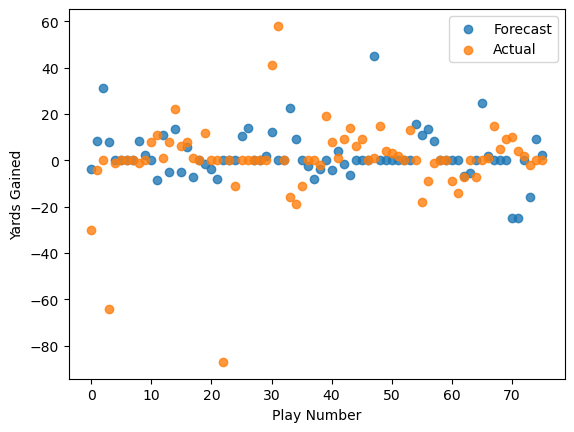

In [5]:
bm.fit()
bm.forecast()
bm.plot_forecast()

In [20]:
sum(bm.train_yards)

array([156])

In [19]:
sum(bm.test_yards)

array([13])

In [6]:
bm.score(bm.test_yards)

146.3254204488123
13


0

In [9]:
x1=True
x2=False

if (x1 and x2) or (x1 and x2):
    print("Y")